In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('stock-price-prediction\Tesla.csv')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\krishnan\AppData\Local\Temp\ipykernel_21064\3181036466.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('stock-price-prediction\Tesla.csv')


In [3]:
print(df.head())

print(df.isnull().sum())
print(df.describe())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
              Open         High          Low        Close        Volume  \
count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
25%      30.000000    30.650000    29.215000    29.884999  1.19

In [4]:
df.shape

(1692, 7)

In [5]:
#  Price volatility
df['Price_Volatility'] = df['High'] - df['Low']

# Percentage change 
df['Pct_Change_Close'] = df['Close'].pct_change()

# Average price 
df['Avg_Price'] = (df['Open'] + df['Close']) / 2

df.dropna(inplace=True)

In [6]:

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
print(df.head())

        Date       Open       High        Low      Close    Volume  Adj Close  \
1 2010-06-30  25.790001  30.420000  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.920000  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.100000  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.000000  15.830000  16.110001   6866900  16.110001   
5 2010-07-07  16.400000  16.629999  14.980000  15.800000   6921700  15.800000   

   Price_Volatility  Pct_Change_Close  Avg_Price  
1          7.120001         -0.002511  24.810001  
2          5.650000         -0.078473  23.479999  
3          4.390001         -0.125683  21.100001  
4          4.170000         -0.160937  18.055000  
5          1.649999         -0.019243  16.100000  


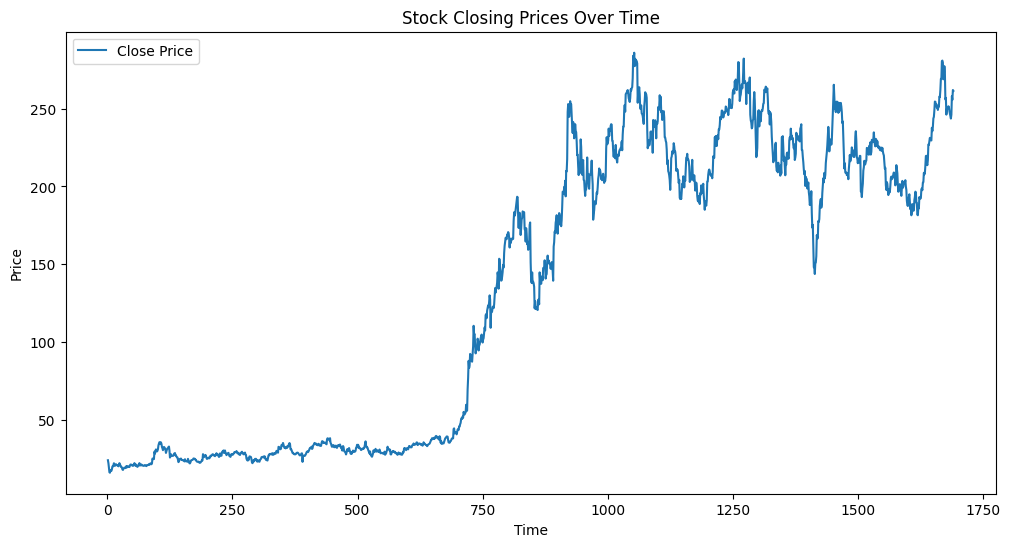

In [7]:
#  closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
# Extract day, month, and year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
print(df.head())

        Date       Open       High        Low      Close    Volume  Adj Close  \
1 2010-06-30  25.790001  30.420000  23.299999  23.830000  17187100  23.830000   
2 2010-07-01  25.000000  25.920000  20.270000  21.959999   8218800  21.959999   
3 2010-07-02  23.000000  23.100000  18.709999  19.200001   5139800  19.200001   
4 2010-07-06  20.000000  20.000000  15.830000  16.110001   6866900  16.110001   
5 2010-07-07  16.400000  16.629999  14.980000  15.800000   6921700  15.800000   

   Price_Volatility  Pct_Change_Close  Avg_Price  day  month  year  
1          7.120001         -0.002511  24.810001   30      6  2010  
2          5.650000         -0.078473  23.479999    1      7  2010  
3          4.390001         -0.125683  21.100001    2      7  2010  
4          4.170000         -0.160937  18.055000    6      7  2010  
5          1.649999         -0.019243  16.100000    7      7  2010  


In [9]:
features = ['Open', 'High', 'Low', 'Volume', 'day', 'month', 'year', 'Price_Volatility', 'Pct_Change_Close']
X = df[features]
y = df['Close']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
# Evaluate 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 1.7301598992146257
Root Mean Squared Error (RMSE): 1.3153554269529684
R-squared (R²): 0.9998132235384148


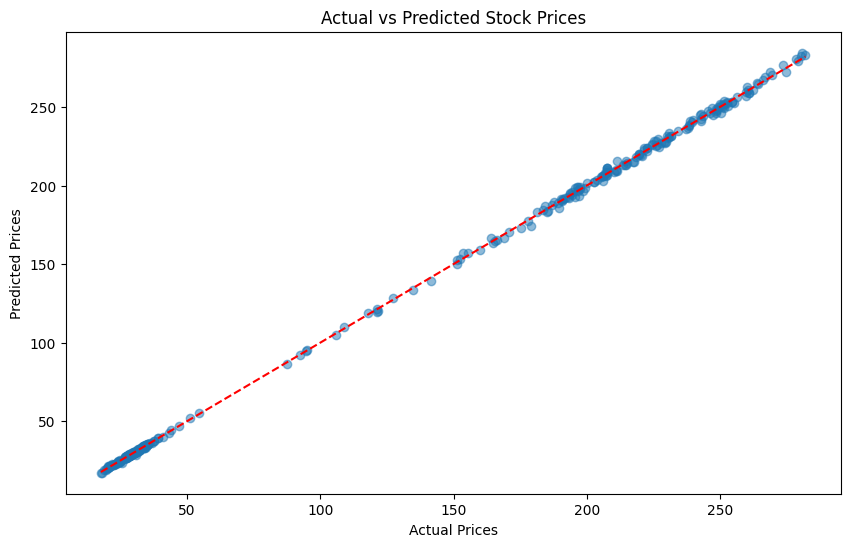

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

In [16]:
def predict_close_price(open_price, high, low, volume, day, month, year):
    input_data = {
        'Open': [open_price],
        'High': [high],
        'Low': [low],
        'Volume': [volume],
        'day': [day],
        'month': [month],
        'year': [year],
        'Price_Volatility': [high - low],  
        'Pct_Change_Close': [0],  
        'Avg_Price': [(open_price + low) / 2] 
    }
    
   
    input_df = pd.DataFrame(input_data)
    
   
    input_df = input_df[features] 
    
   
    predicted_close = model.predict(input_df)
    
    return predicted_close[0]  
open_price = 353.44
high = 354.98
low = 334.42
volume =  73350000
day = 21
month = 2
year = 2025

predicted_close = predict_close_price(open_price, high, low, volume, day, month, year)
print(f'Predicted Close Price: {predicted_close}')

Predicted Close Price: 339.11807414071654
